In [1]:
import gurobipy as gp
import numpy as np
import pandas as pd
from scipy import stats

from gurobi_implementation import GurobiSolution
from data_market import Seller, MarketOperator, Market, Buyer

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [3]:
test_1 = np.random.normal(20, 5, 100000)
test_2 = np.random.normal(40, 9, 100000)
test_3 = np.random.normal(60, 12, 100000)
test_4 = np.random.normal(120, 4, 100000)

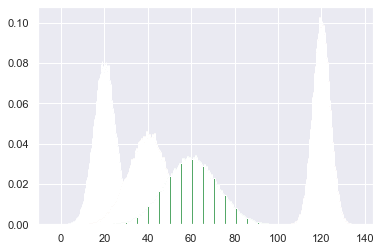

In [4]:
probas_1, values_1, _ = plt.hist(test_1, bins=200, density=True)
probas_2, values_2, _ = plt.hist(test_2, bins=200, density=True)
probas_3, values_3, _ = plt.hist(test_3, bins=200, density=True)
probas_4, values_4, _ = plt.hist(test_4, bins=200, density=True)

probas_1 = probas_1 / probas_1.sum()
probas_2 = probas_2 / probas_2.sum()
probas_3 = probas_3 / probas_3.sum()
probas_4 = probas_4 / probas_4.sum()

In [5]:
a_1 = stats.rv_histogram([probas_1, values_1])
a_2 = stats.rv_histogram([probas_2, values_2])
a_3 = stats.rv_histogram([probas_3, values_3])
a_4 = stats.rv_histogram([probas_4, values_4])

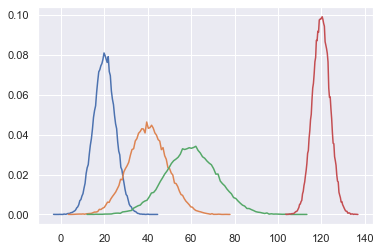

In [6]:
fig, ax = plt.subplots()

ax.plot(np.linspace(*a_1.support(), 100), a_1.pdf(np.linspace(*a_1.support(), 100)))
ax.plot(np.linspace(*a_2.support(), 100), a_2.pdf(np.linspace(*a_2.support(), 100)))
ax.plot(np.linspace(*a_3.support(), 100), a_3.pdf(np.linspace(*a_3.support(), 100)))
ax.plot(np.linspace(*a_4.support(), 100), a_4.pdf(np.linspace(*a_4.support(), 100)))

fig;

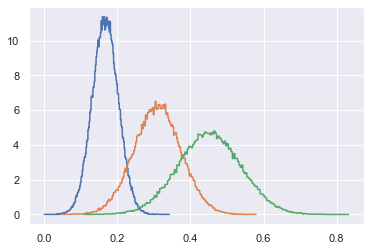

In [7]:
seller_1 = Seller(probas_1, values_1, wager=100)
seller_2 = Seller(probas_2, values_2, wager=100)
seller_3 = Seller(probas_3, values_3, wager=100)

sellers = [seller_1, seller_2, seller_3]

buyer = Buyer(probas_4, values_4, utility = 200)

task = 80

market_1 = Market(sellers, buyer, task = task)

market_1.plot_scaled_forecasts()

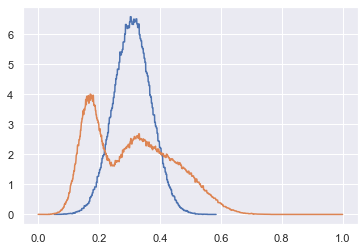

In [8]:
qa_forecast_scaled = market_1.scaled_aggregation(type = 'QA', plot = True)
lop_forecast_scaled = market_1.scaled_aggregation(type = 'LOP', plot = True)

In [9]:
lop_forecast_scaled.support()

(0.0, 1.0)

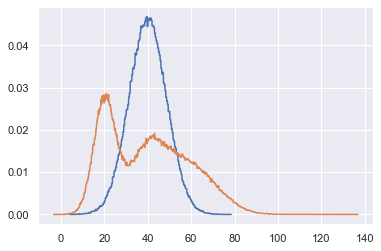

In [10]:
qa_forecast = market_1.aggregation(type = 'QA', plot = True)
lop_forecast = market_1.aggregation(type = 'LOP', plot = True)

In [11]:
market_1.make_scaling()

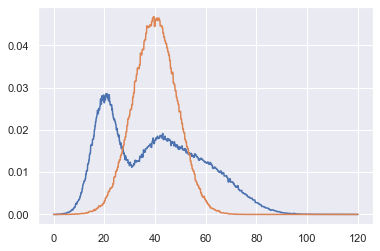

In [12]:
plt.plot(np.linspace(0,120,1000), lop_forecast.pdf(np.linspace(0,120,1000)))
plt.plot(np.linspace(0,120,1000), qa_forecast.pdf(np.linspace(0,120,1000)))

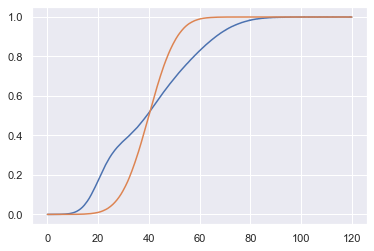

In [13]:
plt.plot(np.linspace(0,120,1000), lop_forecast.cdf(np.linspace(0,120,1000)))
plt.plot(np.linspace(0,120,1000), qa_forecast.cdf(np.linspace(0,120,1000)))

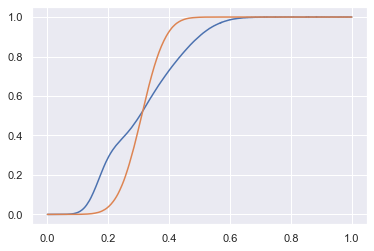

In [14]:
plt.plot(np.linspace(0,1,1000), lop_forecast_scaled.cdf(np.linspace(0,1,1000)))
plt.plot(np.linspace(0,1,1000), qa_forecast_scaled.cdf(np.linspace(0,1,1000)))

In [15]:
lop_forecast.cdf(task)

0.9842120574026958

In [16]:
lop_forecast_scaled.cdf(market_1.scaled_task)

0.9838871858834431

In [17]:
qa_forecast.cdf(task)

1.0

In [18]:
qa_forecast_scaled.cdf(market_1.scaled_task)

1.0

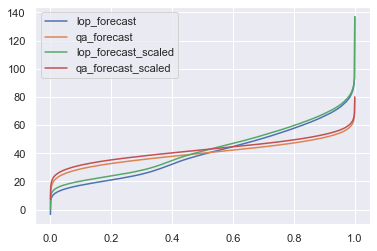

In [42]:
multiplier = max(lop_forecast.support()[-1], qa_forecast.support()[-1])

plt.plot(np.linspace(0,1,1000), lop_forecast.ppf(np.linspace(0,1,1000)), label = 'lop_forecast')
plt.plot(np.linspace(0,1,1000), qa_forecast.ppf(np.linspace(0,1,1000)), label = 'qa_forecast')
plt.plot(np.linspace(0,1,1000), multiplier*lop_forecast_scaled.ppf(np.linspace(0,1,1000)), label = 'lop_forecast_scaled')
plt.plot(np.linspace(0,1,1000), multiplier*qa_forecast_scaled.ppf(np.linspace(0,1,1000)), label = 'qa_forecast_scaled')

plt.legend()

In [20]:
market_1._scoring(qa_forecast_scaled, task = market_1.scaled_task)

0.7440275442631188

In [21]:
market_1._scoring(lop_forecast_scaled, task = market_1.scaled_task)

0.7855235967949842

In [22]:
(1 - market_1._scoring(qa_forecast_scaled, task = market_1.scaled_task)) / (1 - market_1._scoring(lop_forecast_scaled, task = market_1.scaled_task))

1.1934760743455761

In [23]:
market_1._scoring(qa_forecast_scaled, task = market_1.scaled_task) / market_1._scoring(lop_forecast_scaled, task = market_1.scaled_task)

0.9471740216319745

In [24]:
(1 - market_1._scoring(qa_forecast, task = task)) / (1 -  market_1._scoring(lop_forecast, task = task))

1.1915982151812465

In [25]:
market_1._scoring(qa_forecast, task = task) / market_1._scoring(lop_forecast, task = task)

1.1983284965515812

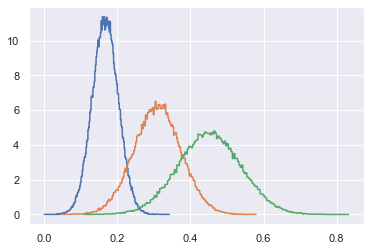

In [26]:
market_1.plot_scaled_forecasts()

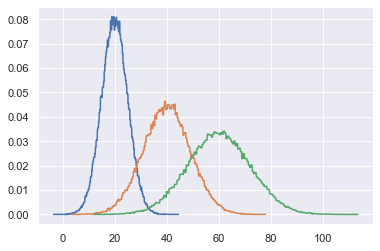

In [27]:
market_1.plot_forecasts()

In [28]:
market_1._scoring(qa_forecast, task = task) / market_1._scoring(lop_forecast, task = task)

1.1983284965515812

In [29]:
1 - market_1._scoring(qa_forecast, task = task)

35.11411626148531

In [30]:
market_1._scoring(seller_1.forecast_rv, task = task)

-56.19421644180831

In [31]:
market_1._scoring(market_1.scaled_dict['Seller #0'], task = market_1.scaled_task)

0.5918273235762261

In [32]:
market_1._scoring(seller_2.forecast_rv, task = task)

-33.90114065644844

In [33]:
market_1._scoring(seller_3.forecast_rv, task = task)

-12.700467121592627

In [34]:
(1 - market_1._scoring(seller_1.forecast_rv, task = task)) / (1 - market_1._scoring(seller_2.forecast_rv, task=task))

1.6387492032080886

In [35]:
(1 - market_1._scoring(market_1.scaled_dict['Seller #0'], task = market_1.scaled_task)) / (1 - market_1._scoring(market_1.scaled_dict['Seller #1'], task =  market_1.scaled_task))

1.604428541593601

In [36]:
market_1.calculate_payoffs()

[ 84.65752247 100.03441269 115.30806485]
[  0.          90.70905592 109.29094408]


array([-15.34247753,  90.74346861, 124.59900893])

In [37]:
market_1.score_dict

{'Seller #0': 0.5918273235762261,
 'Seller #1': 0.745596225794914,
 'Seller #2': 0.8983327473920307}

In [38]:
market_1.buyers_score

0.7279799378762097